# Python II Assignment

## 1 Random Variates from Multi-Dimensional Ball

In the naive method, we draw from the n-dimensional cube where the length of the side is $2\rho$. We define a success when our draw is contained within our n-dimensional sphere with radius $\rho$. Therefore, the probability of draw from our n-dimensional cube that is contained in our n-dimensional sphere is simply the volume of the sphere divided by the volume of the ball, i.e. $$ P[success] = \frac{\frac{\pi^{\frac{n}{2}}}{\Gamma(\frac{n}{2} + 1)}\rho^{n}}{(2\rho)^{n}} .$$ This simplifies to: $$ P[success] = (\frac{\sqrt{\pi}}{2})^{n}\frac{1}{\Gamma(\frac{n}{2}+1)} .$$ We can see that this converges to zero as n tends to infinity. Moreover, note that the probability is independent of $\rho$. Now, we will implement this probability and display the probabilities for different n.

In [1]:
# import dependencies
import numpy as np
import scipy.special as special
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from time import perf_counter

### 1.1

In [2]:
def prob_success(n):
    """Calculate the probability of successfully drawing within a n-dimensional sphere
    
    Arguments
    ---------
    n : integer
        Number of dimensions to calculate the probability for.
    
    Returns
    -------
    float
        Probability of success.
    """
    return (0.5*np.sqrt(np.pi))**n / special.gamma(0.5*n + 1)

Text(0.5, 1.0, 'Probability of success of the naive method in higher dimensions')

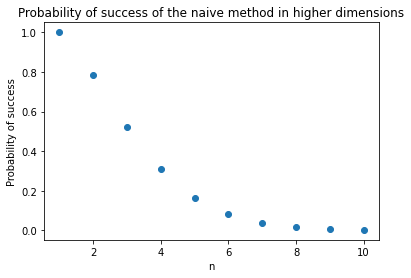

In [3]:
# visualising probabilities
prob = []
for n in range(1, 11):
    prob.append((n, prob_success(n)))
prob = np.array(prob)
plt.scatter(prob[:,0], prob[:,1])
plt.xlabel('n')
plt.ylabel('Probability of success')
plt.title('Probability of success of the naive method in higher dimensions')
#plt.show()

### 1.2

Improve by drawing multiple times in one go instead of using function in loop.

In [4]:
def naive(n, rho):
    """ Naive method for drawing uniformly from a n-dimensional sphere
    
    Arguments
    ---------
    n : integer
        Number of dimensions.
    
    rho : float
        Radius of sphere.
    
    Returns
    -------
    draw: np.array (n,)
        Sucessful drawing from n-dimensional sphere.
    
    """
    while True:
        # draw from box
        draw = np.random.uniform(-rho, rho, n)
        #check wether contained within sphere
        norm = np.sqrt(np.sum(draw**2, axis=0))
        #either return or compute again
        if norm <= rho:
            return draw
        else:
            pass

In [5]:
def Marsaglia(n, rho, amount):
    """ Margaglia method for drawing uniformly from a n-dimensional sphere
    
    Arguments
    ---------
    n : integer
        Number of dimensions.
    
    rho : float
        Radius of sphere.
        
    amount : integer
        Amount of points to generate.
    
    Returns
    -------
    draw: np.array (amount,n)
        Sucessful drawing from n-dimensional sphere.
    """
    # First, we draw a point on the surface on the n-dimensional sphere according to the algorithm proposed by Marsaglia.
    normal = np.random.randn(n, amount)
    surface = normal / np.sqrt(np.sum(normal**2, axis=0))
    # Now, we take a point at a uniformly random distance between the origin and the point itself. Hence, obtaining a point within the
    # n-dimensional sphere itself
    u = np.random.uniform(0, rho, amount)
    draw = u**(1/n) * surface
    return draw

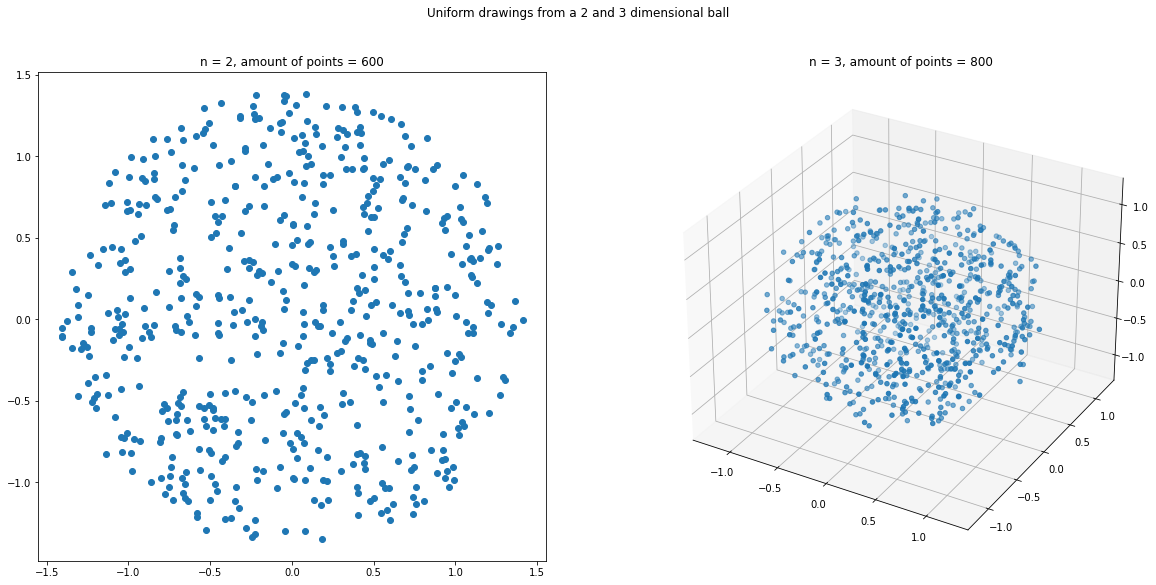

In [6]:
# visualising the Marsaglia method
rho = 2
amount_2D = 600
amount_3D = 800
n_two = Marsaglia(2, rho, amount_2D)
n_three = Marsaglia(3, rho, amount_3D)

#plot
fig = plt.figure(figsize=(20,9))
fig.suptitle('Uniform drawings from a 2 and 3 dimensional ball')

#first subplot
ax = fig.add_subplot(1,2,1)
ax.set_title('n = 2, amount of points = {}'.format(amount_2D))
ax.scatter(n_two[0], n_two[1])

# second subsplot
ax = fig.add_subplot(1,2,2, projection='3d')
ax.set_title('n = 3, amount of points = {}'.format(amount_3D))
ax.scatter(n_three[0], n_three[1], n_three[2])

#plt.show()

### 1.3

In [7]:
# time different methods
amount = 1000
rho = 2
time_data = []
for n in range(2,11):
    # time naive
    naive_start = perf_counter()
    draw_naive = []
    for i in range(amount):
        draw_naive.append(naive(n, rho))
    draw_naive = np.array(draw_naive)
    naive_end = perf_counter()
    naive_time = naive_end - naive_start
    # time Marsaglia
    mars_start = perf_counter()
    draw_marsaglia = Marsaglia(n, rho, amount)
    mars_end = perf_counter()
    mars_time = mars_end - mars_start

    time_data.append((n, naive_time, mars_time, naive_time/mars_time))
time_data = np.array(time_data)
time_data

array([[2.00000000e+00, 5.75066000e-02, 2.61599998e-04, 2.19826454e+02],
       [3.00000000e+00, 3.65036000e-02, 4.01600002e-04, 9.08954179e+01],
       [4.00000000e+00, 6.65676000e-02, 4.30500004e-04, 1.54628570e+02],
       [5.00000000e+00, 9.45564000e-02, 4.65799996e-04, 2.02997855e+02],
       [6.00000000e+00, 1.88641300e-01, 4.39199997e-04, 4.29511159e+02],
       [7.00000000e+00, 3.87274000e-01, 5.49000004e-04, 7.05417117e+02],
       [8.00000000e+00, 9.72038300e-01, 5.81500004e-04, 1.67160498e+03],
       [9.00000000e+00, 2.46650870e+00, 5.94400000e-04, 4.14957722e+03],
       [1.00000000e+01, 6.18412730e+00, 7.15600007e-04, 8.64187709e+03]])

Text(0.5, 1.0, 'Relative time of naive method compared to the Marsaglia method in higher dimensions')

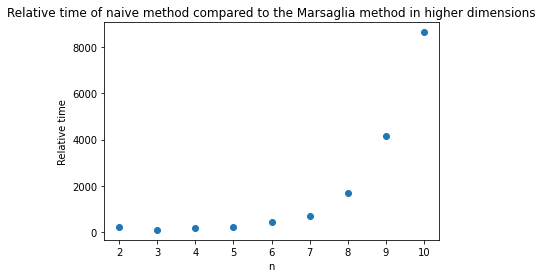

In [8]:
# visualise efficiency
plt.scatter(time_data[:,0], time_data[:,-1])
plt.xlabel('n')
plt.ylabel('Relative time')
plt.title('Relative time of naive method compared to the Marsaglia method in higher dimensions')
#plt.show()